<a href="https://colab.research.google.com/github/Rivalll-09/SIG/blob/main/Bireuen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import geopandas dan juga import matplotlib


In [ ]:
import geopandas as gpd
from geopandas import datasets, read_file, geodataframe
import matplotlib.pyplot as plt


import file geojson dan buka file tersebut

In [ ]:
filename = "Bireuen.geojson"
file = open(filename)
kota = gpd.read_file(file)


tuliskan kota.plot() untuk melihat peta yang sudah di arsir

<Axes: >

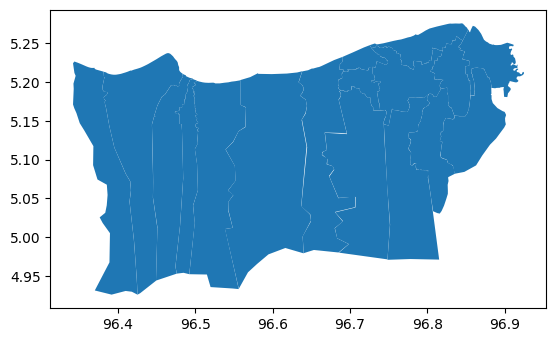

In [ ]:
kota.plot()

tulis kota.head() untuk melihat header dan isi tabel

In [ ]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIAPDM,SHAPE_Leng,SHAPE_Area,geometry
0,null,Peudada,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Bireuen,null,Aceh,null,0,,,"POLYGON ((96.55813 5.20246, 96.55851 5.17032, ..."
1,null,Peulimbang,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Bireuen,null,Aceh,null,0,,,"POLYGON ((96.50217 5.20170, 96.50054 5.20009, ..."
2,null,Peusangan Siblah Krueng,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Bireuen,null,Aceh,null,0,,,"POLYGON ((96.82574 5.19266, 96.82154 5.19198, ..."
3,null,Juli,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Bireuen,null,Aceh,null,0,,,"POLYGON ((96.68829 5.18939, 96.68741 5.18878, ..."
4,null,Jeumpa,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Bireuen,null,Aceh,null,0,,,"POLYGON ((96.63836 5.21369, 96.63375 5.19959, ..."


install mapsclassify

In [ ]:
pip install mapclassify

import mapsclassify dan tulis kota.explore() untuk melihat peta yang di arsir dalam map

In [ ]:
import mapclassify
kota.explore()

tulis kota.explore() dan ketik beberapa code untuk membuat warna pada peta yang sudah di arsir

In [ ]:
kota.explore(
    column="NAMOBJ",  # make choropleth based on "BoroName" column
    tooltip="NAMOBJ",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

Import folium dan beberapa kode untuk melihat peta yang sudah di arsir dalam warna merah

In [ ]:
import folium
m = kota.explore(
    column="NAMOBJ",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["NAMOBJ", "NAMOBJ"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="NAMOBJ",  # name of the layer in the map
)
kota.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="NAMOBJ",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="NAMOBJ",  # name of the layer in the map
)
folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control
m  # show map